In [68]:
# Import libraries

import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import differential_evolution
from joblib import Parallel, delayed

# 2HDM with $Z_2$ symmetry

In [69]:
dim = 20000 # Number of (pseudo-)random numbers.

# The idea is to generate some (pseudo-)random numbers so as to find which combination is valid, in light of the analysis presented in the Master' Thesis associated with this code.

rho_3 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_4 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_5 = np.random.default_rng().uniform(0,5,dim) # rho_5 is |rho_5|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

alpha_5 = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_5.

In [70]:
def search_minimum_values(rho_3_param,rho_4_param,rho_5_param,dim_parameter,epsilon):

    # This function finds the valid values for the parameters of the 2HDM potential.

    r2 = np.linspace(0,1,200) # r2 is r^2, which takes values from 0 to 1.
    cosine_alpha_5_plus_phi = np.linspace(-1,1,200) # cosine_alpha_5_plus_phi is cos(alpha_5+phi), whose values vary from -1 to 1.
    x = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    y = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    #
    rho_3_eff_min_valid = []
    rho_3_eff = np.zeros((len(r2),len(cosine_alpha_5_plus_phi)))
    rho_3_eff_min = np.zeros(dim_parameter)
    #
    for k in range(0,dim_parameter):
        #
        for i in range(0,len(r2)):
            for j in range(0,len(cosine_alpha_5_plus_phi)):
                rho_3_eff[i,j] = rho_3_param[k]+r2[i]*(rho_4_param[k]+rho_5_param[k]*cosine_alpha_5_plus_phi[j])
        #
        rho_3_eff_min[k] = np.min(rho_3_eff)
        V = (1/2)*x**2+(1/2)*y**2+rho_3_eff_min[k]*x*y
        #
        if np.min(V) >= -epsilon: ##The minus sign is to include 0.
            rho_3_eff_min_valid.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(rho_3_eff_min[k])])
            
            # It is possible to use the following code in order to work with np.float64:
            # rho_3_eff_min_valid.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],rho_3_eff_min[k]])
    #
    if not rho_3_eff_min_valid == []:
        return rho_3_eff_min_valid # First element: rho_3, Second element: rho_4, Third element: |rho_5|, Fourth element: rho_3_eff_min.
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')

In [71]:
# Results

valid_values = search_minimum_values(rho_3,rho_4,rho_5,dim,10**(-5))
valid_values

[[-0.29235523031614363,
  4.366525727974214,
  4.319835143784058,
  -0.29235523031614363],
 [1.907139877221332,
  2.2115778068633007,
  4.587942922048573,
  -0.4692252379639399],
 [3.198410626067556,
  -1.33716357120645,
  0.2516007791187347,
  1.6096462757423713],
 [2.0397293368957996,
  3.399264786989985,
  0.05371968806417993,
  2.0397293368957996],
 [3.1394716100348887, 2.543717749681166, 2.62490139407248, 3.058287965643575],
 [4.464202303736567, 4.91127705997466, 4.76240894698827, 4.464202303736567],
 [4.403211560810195,
  -0.5481993447259628,
  0.32877938826997744,
  3.526232827814255],
 [3.7205557328405963,
  0.9735688172972754,
  0.07014744101891568,
  3.7205557328405963],
 [2.5249901888196034,
  4.5856997958722925,
  4.992975833325487,
  2.1177141513664086],
 [0.19395666665365674,
  4.360105487206747,
  4.514283073620975,
  0.039779080239428666],
 [4.905045860577905, 3.259483817782506, 2.4413484741746885, 4.905045860577905],
 [2.206107656066022, 4.00712983069967, 2.21209923181

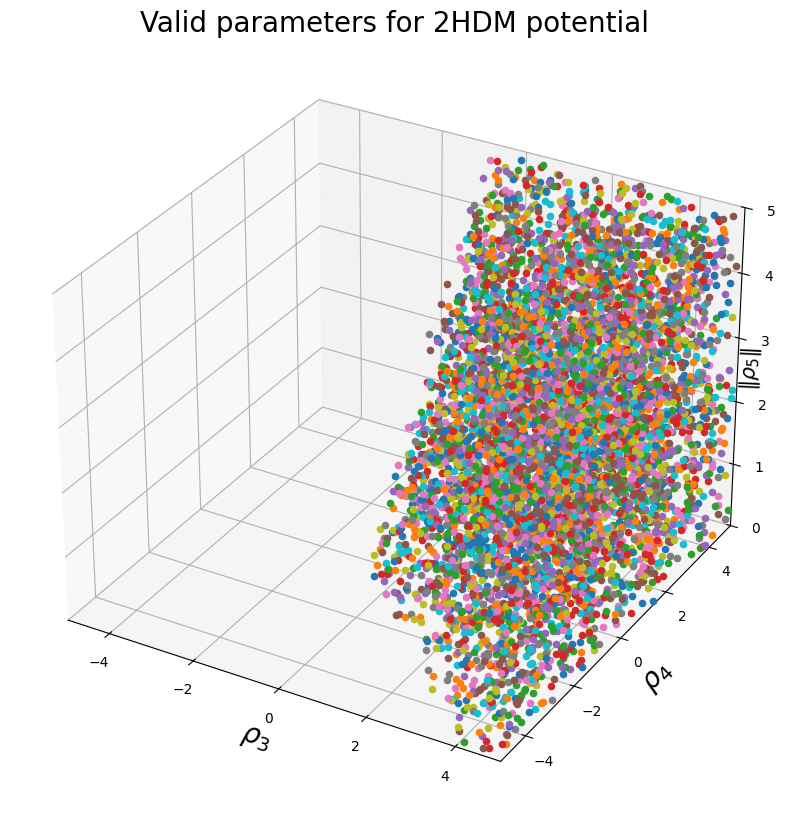

In [72]:
# Plot of the results

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(valid_values)-1,len(valid_values)):
    #
    ax.scatter(valid_values[int(point)][0],valid_values[int(point)][1],valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential',fontsize=20)

plt.show()

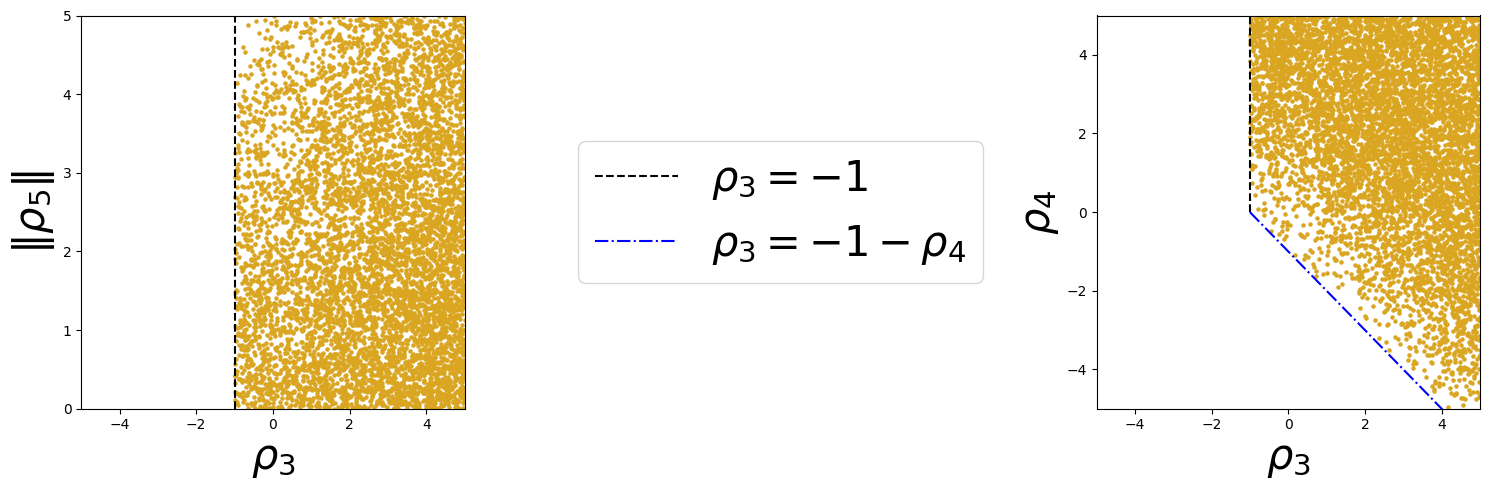

In [102]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][2],color='goldenrod',s=5)

ax.set_xlabel(r'$\rho_{3}$',fontsize=30)
ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=30)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][1],color='goldenrod',s=5)

ax.set_xlabel(r'$\rho_{3}$',fontsize=30)
ax.set_ylabel(r'$\rho_{4}$',fontsize=30)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=30)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [74]:
# Check!

search_minimum_values([0],[0],[0],1,10**(-5))

# As rho_3=rho_4=rho_5=0, then rho_3_eff_min=0, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[0.0, 0.0, 0.0, 0.0]]

In [75]:
# Check!

search_minimum_values([-2],[0],[0],1,10**(-5))

# As rho_3=-2 and rho_4=rho_5=0, then rho_3_eff_min=-2, which is NOT greater than -1, so this values are NOT valid (Error message arises).

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [76]:
# Check!

search_minimum_values([1],[0],[0],1,10**(-5))

# As rho_3=1 and rho_4=rho_5=0, then rho_3_eff_min=1, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[1.0, 0.0, 0.0, 1.0]]

# 2HDM without $Z_2$ symmetry

In [77]:
dim = 100

# Same parameters as above.

rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
alpha_5 = np.random.default_rng().uniform(0,2*np.pi,dim)

rho_6 = np.random.default_rng().uniform(0,5,dim) # rho_6 is |rho_6|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

alpha_6 = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_6.

rho_7 = np.random.default_rng().uniform(0,5,dim) # rho_7 is |rho_7|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 #Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

alpha_7 = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_7.

In [78]:
def search_minimum_values_for_Z2_violating_2HDM(rho_3_param,rho_4_param,rho_5_param,alpha_5_param,rho_6_param,alpha_6_param,rho_7_param,alpha_7_param,dim_param,epsilon_2):

    # The idea here is similar to the previous one but with much more parameters.

    r = np.linspace(0,1,50)
    phi = np.linspace(0,4*np.pi,50)
    chi = np.linspace(0,np.pi/2,50)
    #
    minimum_for_all = []
    V = np.zeros((len(r),len(phi),len(chi)))
    #
    for k in range(0,dim_param):
        #
        for i in range(0,len(r)):
            for j in range(0,len(phi)):
                for w in range(0,len(chi)):
                    V[i,j,w] = 2+((rho_3_param[k]+r[i]**2*(rho_4_param[k]+np.abs(rho_5_param[k])*np.cos(alpha_5_param[k]+phi[j])))-1)*(np.sin(2*chi[w]))**2+np.sin(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_6_param[k]+(1/2)*phi[j])+np.abs(rho_7_param[k])*r[i]*np.cos(alpha_7_param[k]+(1/2)*phi[j])+np.cos(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_6_param[k]+(1/2)*phi[j])-np.abs(rho_7_param[k])*r[i]*np.cos(alpha_7_param[k]+(1/2)*phi[j])))
        #
        if np.min(V) >= -epsilon_2:
            minimum_for_all.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(alpha_5_param[k]),float(rho_6_param[k]),float(alpha_6_param[k]),float(rho_7_param[k]),float(alpha_7_param[k]),float(np.min(V))])
            
             # It is possible to use the following code in order to work with np.float64:
             # minimum_for_all.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],alpha_5_param[k],rho_6_param[k],alpha_6_param[k],rho_7_param[k],alpha_7_param[k],np.min(V)])
    #
    if not minimum_for_all == []:
        return minimum_for_all
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')
    

In [79]:
# Results

search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,alpha_5,rho_6,alpha_6,rho_7,alpha_7,dim,10**(-5))

[[4.111863609119242,
  0.6869078165047648,
  0.5193000461238884,
  2.8826089740134013,
  0.967232356855745,
  1.5827436684648208,
  2.705059901438772,
  3.7000735828945457,
  0.41026321480162187],
 [2.3540351335571206,
  3.821217685999791,
  1.5446791860452225,
  4.1490108217000845,
  2.5795318770144675,
  0.33004477018097633,
  2.67499084232918,
  4.336893193610648,
  0.6385890602942981],
 [3.8771527653288373,
  4.19169755985442,
  4.692355752901356,
  5.221537084136655,
  3.2834335082728683,
  1.882930836046205,
  1.5794118378589754,
  5.5779487307043665,
  0.19613295251143903],
 [2.064693177050482,
  3.77614081666842,
  1.823258503689097,
  5.045628879828334,
  1.5791067268363386,
  0.40251900057161116,
  3.091033080686284,
  3.151325380881233,
  0.4333757749864269],
 [2.1425450580758323,
  2.8587389644255463,
  2.6996682948104773,
  0.8354998827865686,
  3.2461312246560707,
  0.2618134102358739,
  0.41511373666206497,
  3.7357489833408315,
  0.5208426156477857],
 [-0.55263160152112

In [80]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([0],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([0],[0],[0],1,10**(-5))

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0010273036248318]]

In [81]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([-2],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([-2],[0],[0],1,10**(-5))

# NOTE: This code might consider rho_3=-1 as a valid value because it is a limit case

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [82]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([1],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([1],[0],[0],1,10**(-5))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]]

In [83]:
# Due to the fact that this method implies a heavy calculation, another method is presented below.

name_parameter = ['rho_3', 'rho_4', 'rho_5', 'alpha_5', 'rho_6', 'alpha_6', 'rho_7', 'alpha_7']
name_function_variables = ['r', 'phi', 'chi']
num_parameter = len(name_parameter)
num_functiion_variables = len(name_function_variables)


function_variable_regions = [(0, 1),         # r
                             (0, 4*np.pi),   # phi
                             (0, np.pi/2)]   # chi

def generate_random_params(number, limits):

    limits = np.array(limits)  
    lower_limit = limits[:, 0]  
    upper_limit = limits[:, 1]  

    return np.random.uniform(lower_limit, upper_limit, size=(number, len(limits)))

# Define the Z2-violating potential
def V_Z2_less(parameters, function_variables):
    rho_3_param, rho_4_param, rho_5_param, alpha_5_param, rho_6_param, alpha_6_param, rho_7_param, alpha_7_param = parameters
    r, phi, chi = function_variables
    return 2+((rho_3_param+r**2*(rho_4_param+np.abs(rho_5_param)*np.cos(alpha_5_param+phi)))-1)*(np.sin(2*chi))**2+np.sin(2*chi)*(np.abs(rho_6_param)*r*np.cos(alpha_6_param+(1/2)*phi)+np.abs(rho_7_param)*r*np.cos(alpha_7_param+(1/2)*phi)+np.cos(2*chi)*(np.abs(rho_6_param)*r*np.cos(alpha_6_param+(1/2)*phi)-np.abs(rho_7_param)*r*np.cos(alpha_7_param+(1/2)*phi)))

# Minimize the potential in (r, phi, chi) space
def minimize_dependent_params(parameters, bounds):
    def minimize_single(parameter):
        def objective(function_variables):
            return V_Z2_less(parameter, function_variables)
        
        # Scipy native function
        res = differential_evolution(objective, bounds=bounds, strategy='best1bin', tol=1e-6)
        return np.concatenate([parameter, res.x, [res.fun]])

    # Parallel processing
    results = Parallel(n_jobs=-1)(delayed(minimize_single)(parameter) for parameter in parameters)
    
    return results

<div class="alert alert-block alert-info">
⚠️ The function minimize_dependent_params uses parallel processing to compute the calculation. The number of CPU cores selected by default is n_jobs=-1, which means that the computer will use EVERY core (CPU usage 100%) at the same time. This parameter can be changed as desired (for example, n_jobs=4 will just use 4 CPU cores).
</div>

In [84]:
# We first test this method for the Z_2-conserving potential

dim = 10000

regions = [(-5, 5),         # rho_3
           (-5, 5),         # rho_4
           (0, 5),          # |rho_5|
           (0, 2*np.pi),    # alpha_5
           (0, 0),          # |rho_6|
           (0, 0),    # alpha_6
           (0, 0),          # |rho_7|
           (0, 0)]    # alpha_7

# Generate random parameters
parameters = generate_random_params(dim, regions)

# Minimize the function and filter the results with V > 0
results = np.array(minimize_dependent_params(parameters, function_variable_regions))
new_valid_values = results[results[:, -1] > 0]

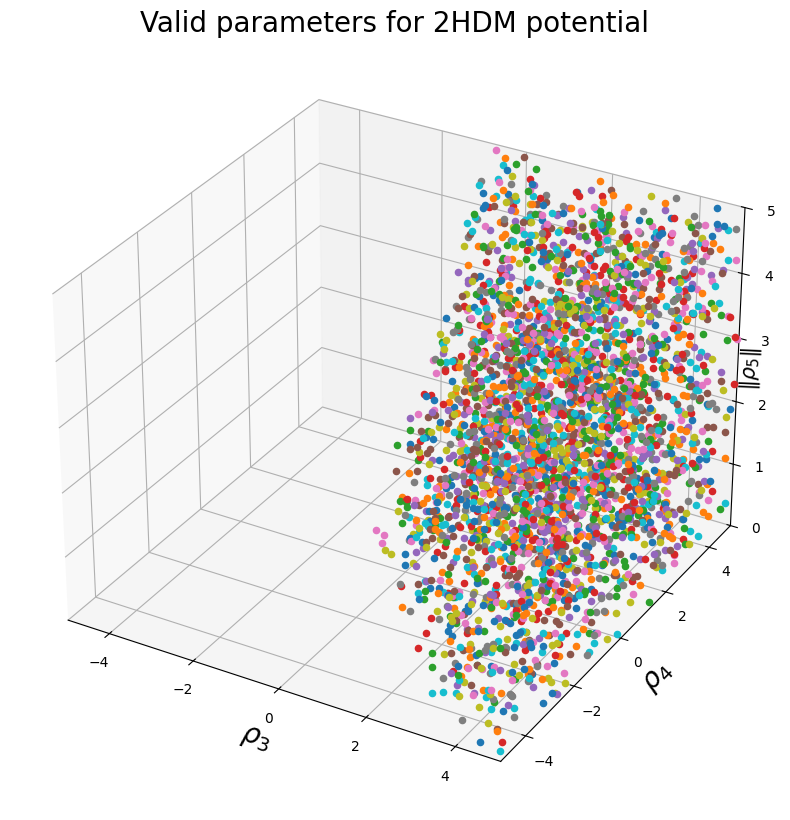

In [85]:
# Plot of the results


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(new_valid_values)-1,len(new_valid_values)):
    #
    ax.scatter(new_valid_values[int(point)][0],new_valid_values[int(point)][1],new_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential', fontsize=20)

plt.show()

# First, let's test this method for the Z_2-conserving potential

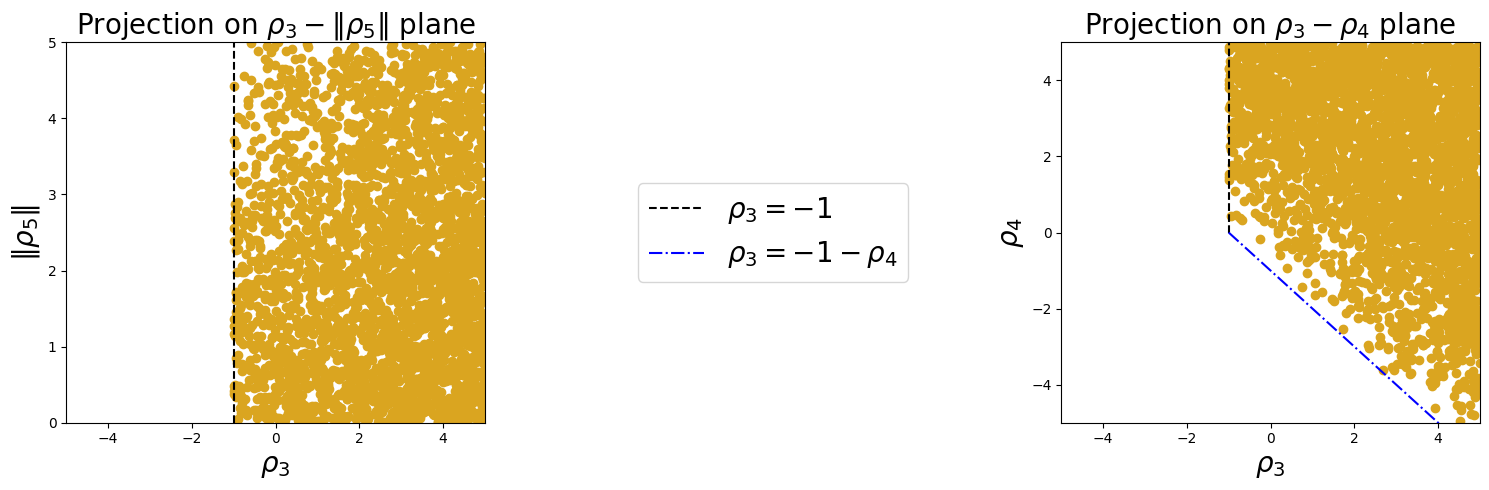

In [86]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

ax.scatter(new_valid_values[:,0], new_valid_values[:,2],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane',fontsize=20)

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

ax.scatter(new_valid_values[:,0], new_valid_values[:,1],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane',fontsize=20)

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [87]:
# Explore Z_2-violating 2HDM results

dim = 1000

regions = [(-5, 5),         # rho_3
           (-5, 5),         # rho_4
           (0, 5),          # |rho_5|
           (0, 2*np.pi),    # alpha_5
           (0, 5),          # |rho_6|
           (0, 2*np.pi),    # alpha_6
           (0, 5),          # |rho_7|
           (0, 2*np.pi)]    # alpha_7

# Generate random parameters
parameters = generate_random_params(dim, regions)

# Minimize the function and filter the results with V > 0
results = np.array(minimize_dependent_params(parameters, function_variable_regions))
Z2_violating_valid_values = results[results[:, -1] > 0]

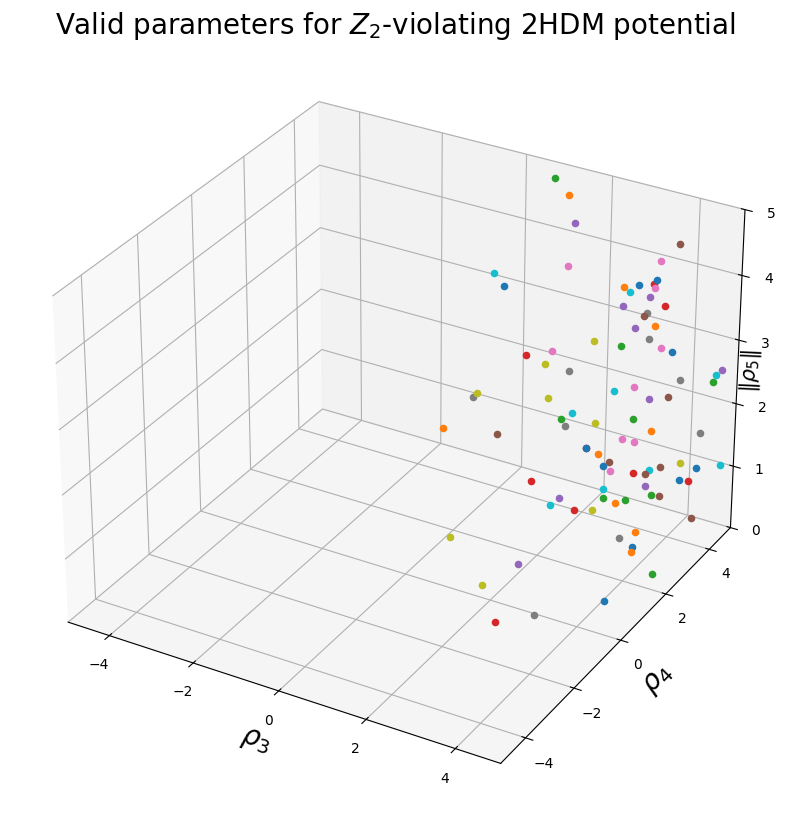

In [88]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(Z2_violating_valid_values)-1,len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0],Z2_violating_valid_values[int(point)][1],Z2_violating_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for $Z_2$-violating 2HDM potential', fontsize=20)

plt.show()

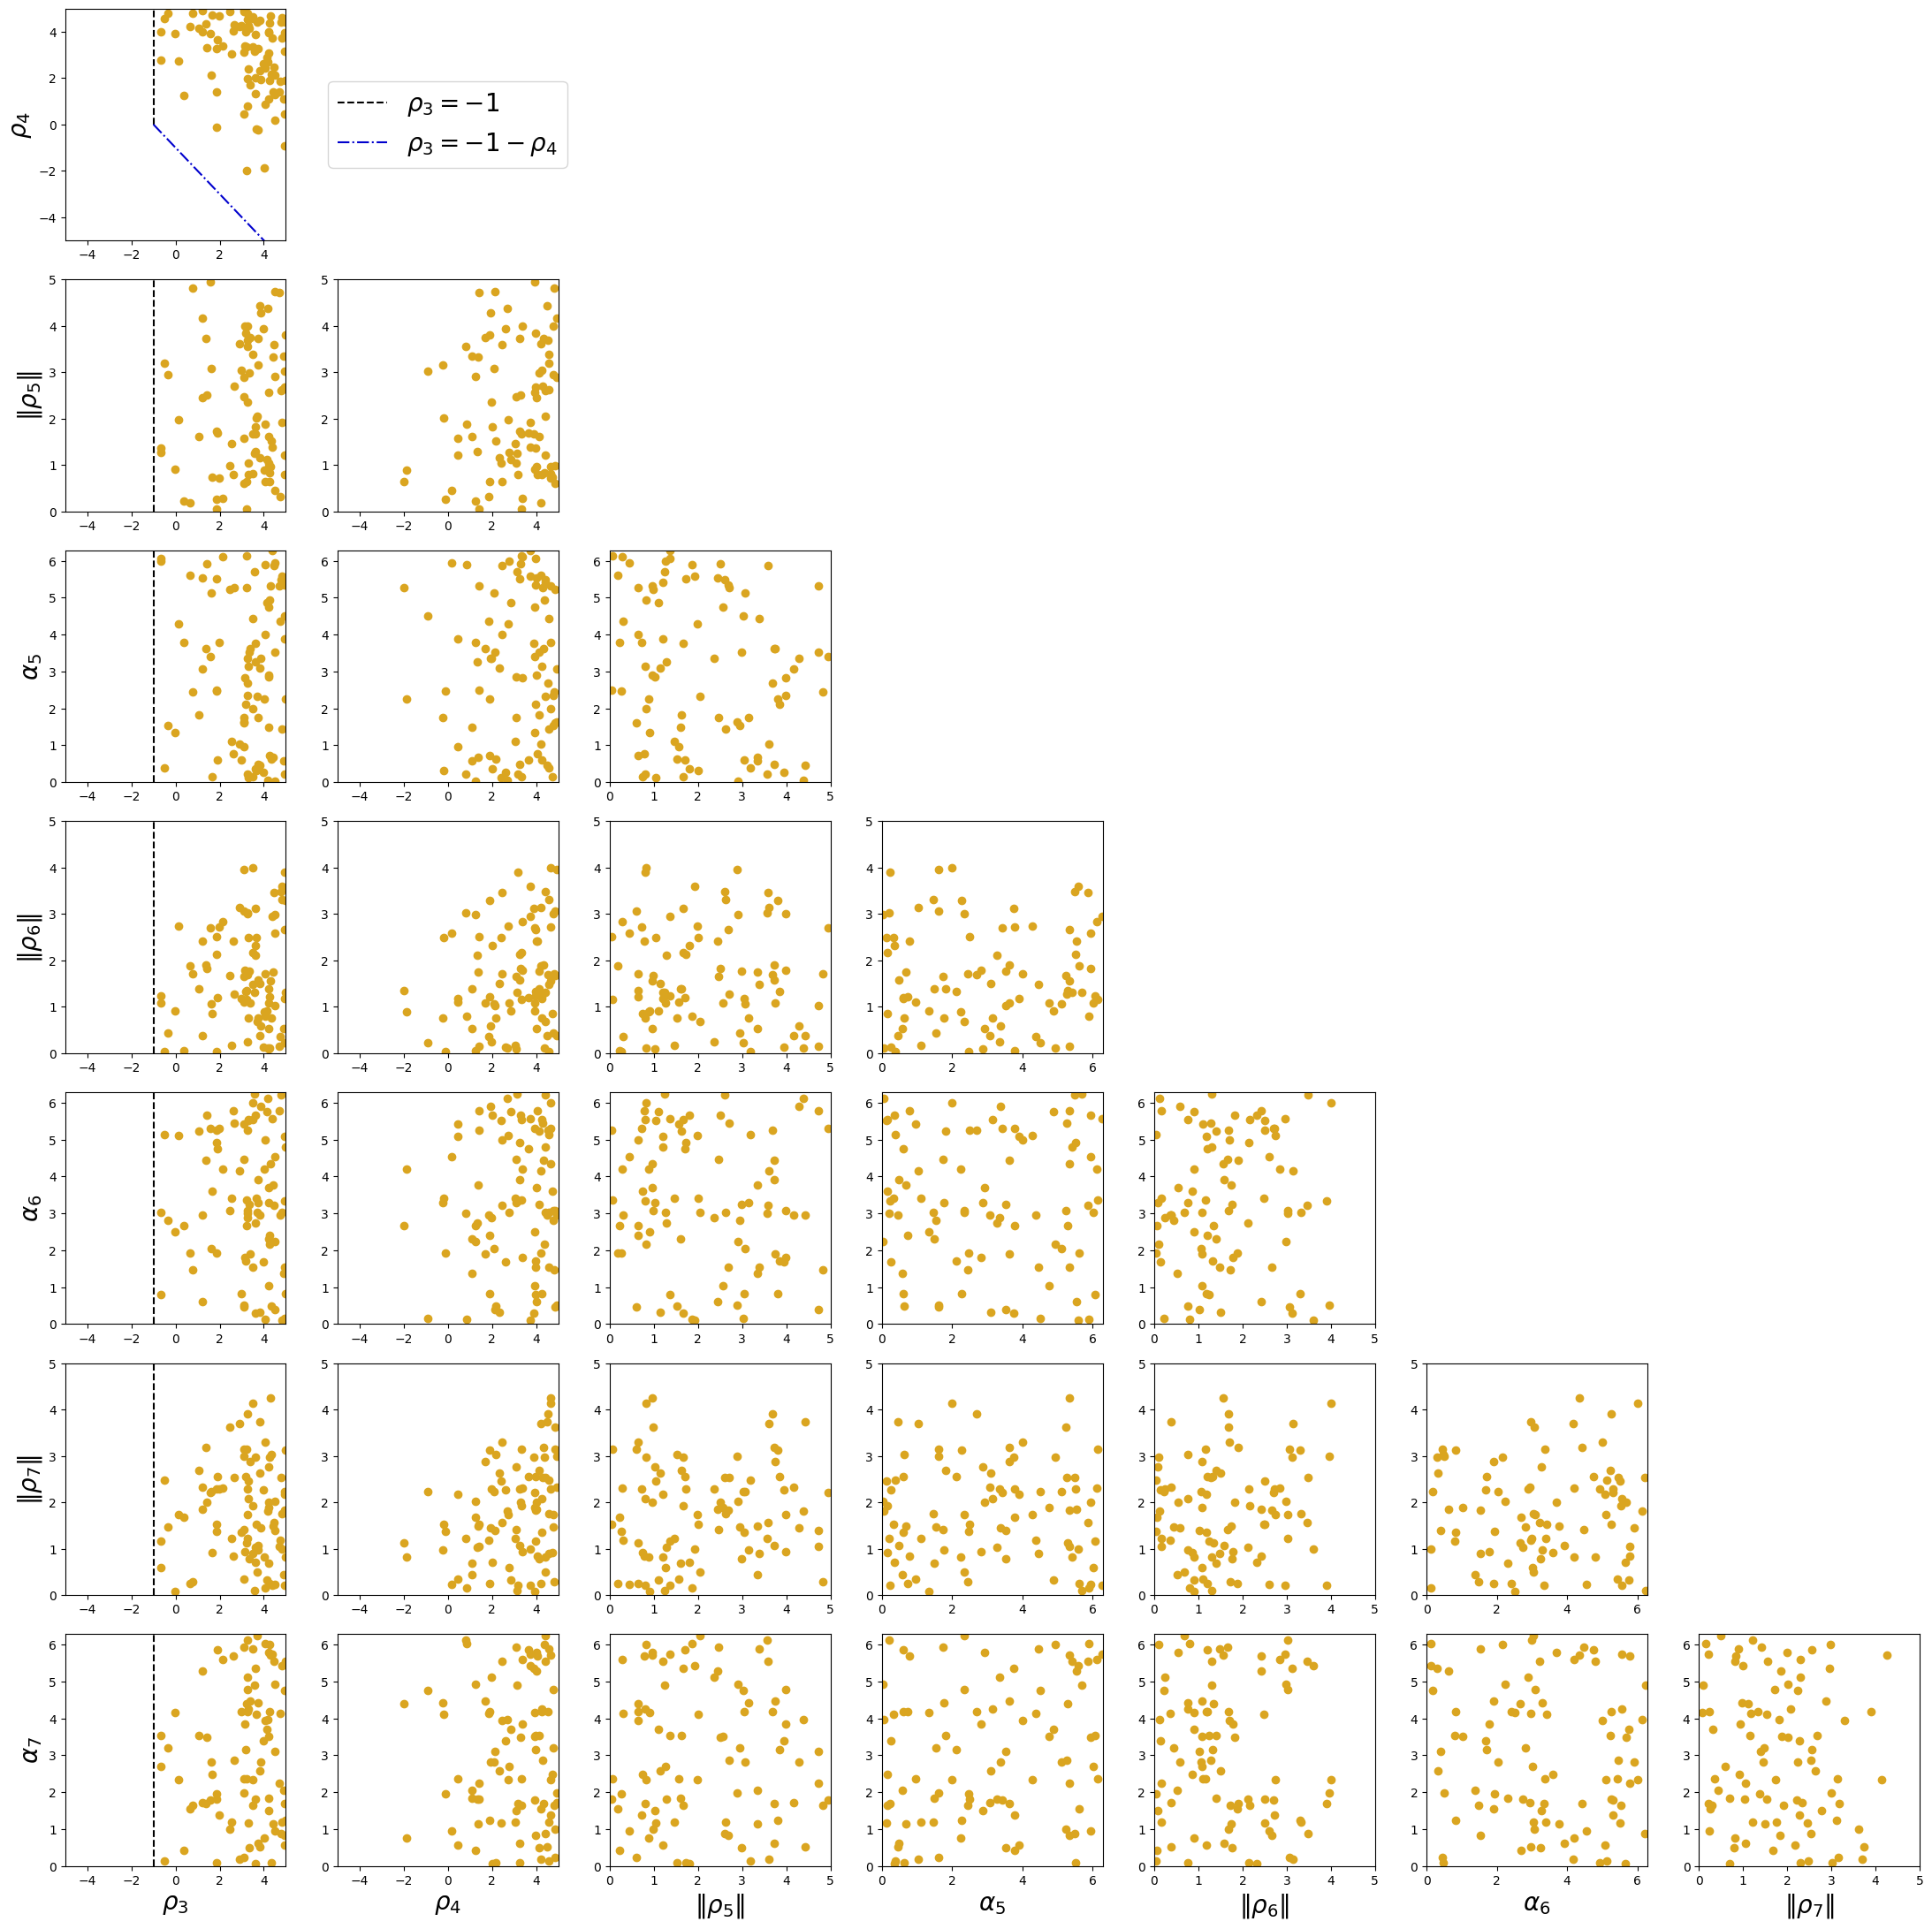

In [89]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,1], color='goldenrod')

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='mediumblue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,2],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,2],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,3],color='goldenrod')

ax.set_ylabel(r'$\alpha_{5}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,3],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,3],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha_{6}$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

ax.scatter(Z2_violating_valid_values[:,4], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

ax.scatter(Z2_violating_valid_values[:,4], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

ax.scatter(Z2_violating_valid_values[:,5], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\alpha_{7}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\alpha_{5}$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

ax.scatter(Z2_violating_valid_values[:,4], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

ax.scatter(Z2_violating_valid_values[:,5], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\alpha_{6}$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

ax.scatter(Z2_violating_valid_values[:,6], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='mediumblue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

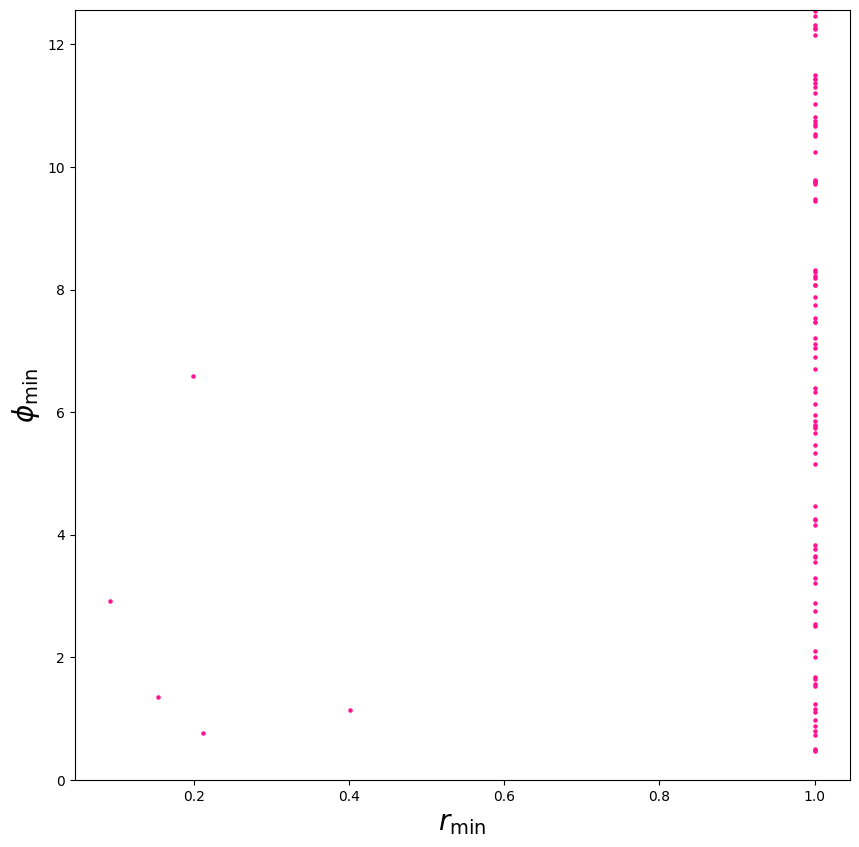

In [90]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1)

ax.scatter(Z2_violating_valid_values[:,8], Z2_violating_valid_values[:,9], color='deeppink',s=5)

ax.set_ylabel(r'$\phi_{\text{min}}$',fontsize=20)
ax.set_xlabel(r'$r_{\text{min}}$',fontsize=20)

ax.set_ylim([0, 4*np.pi])

plt.show()

# Symmetric 2HDM potential 

In [91]:
# Explore Symmetric Z_2-violating 2HDM results

dim = 1000

regions = [(-5, 5),         # rho_3
           (-5, 5),         # rho_4
           (0, 5),          # |rho_5|
           (0, 2*np.pi),    # alpha_5
           (0, 5),          # |rho_6|
           (0, 2*np.pi),    # alpha_6
           (0, 0),          # |rho_7| will be overwrtten by |rho_6|
           (0, 0)]          # alpha_7 will be overwritten by alpha_6


# Generate random parameters
parameters = generate_random_params(dim, regions)
parameters[:, 6] = parameters[:, 4]  # rho_7 = rho_6
parameters[:, 7] = parameters[:, 5]  # alpha_7 = alpha_6

# Minimize the function and filter the results with V > 0
results = np.array(minimize_dependent_params(parameters, function_variable_regions))
symmetric_valid_values = results[results[:, -1] > 0]

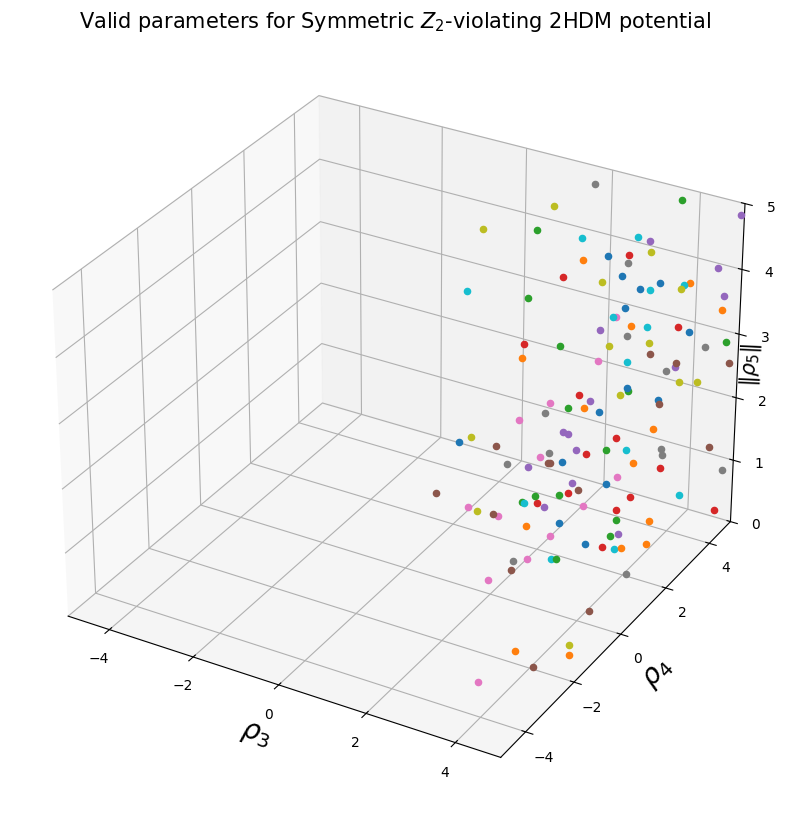

In [92]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(symmetric_valid_values)-1,len(symmetric_valid_values)):
    #
    ax.scatter(symmetric_valid_values[int(point)][0],symmetric_valid_values[int(point)][1],symmetric_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for Symmetric $Z_2$-violating 2HDM potential',fontsize=15)

plt.show()

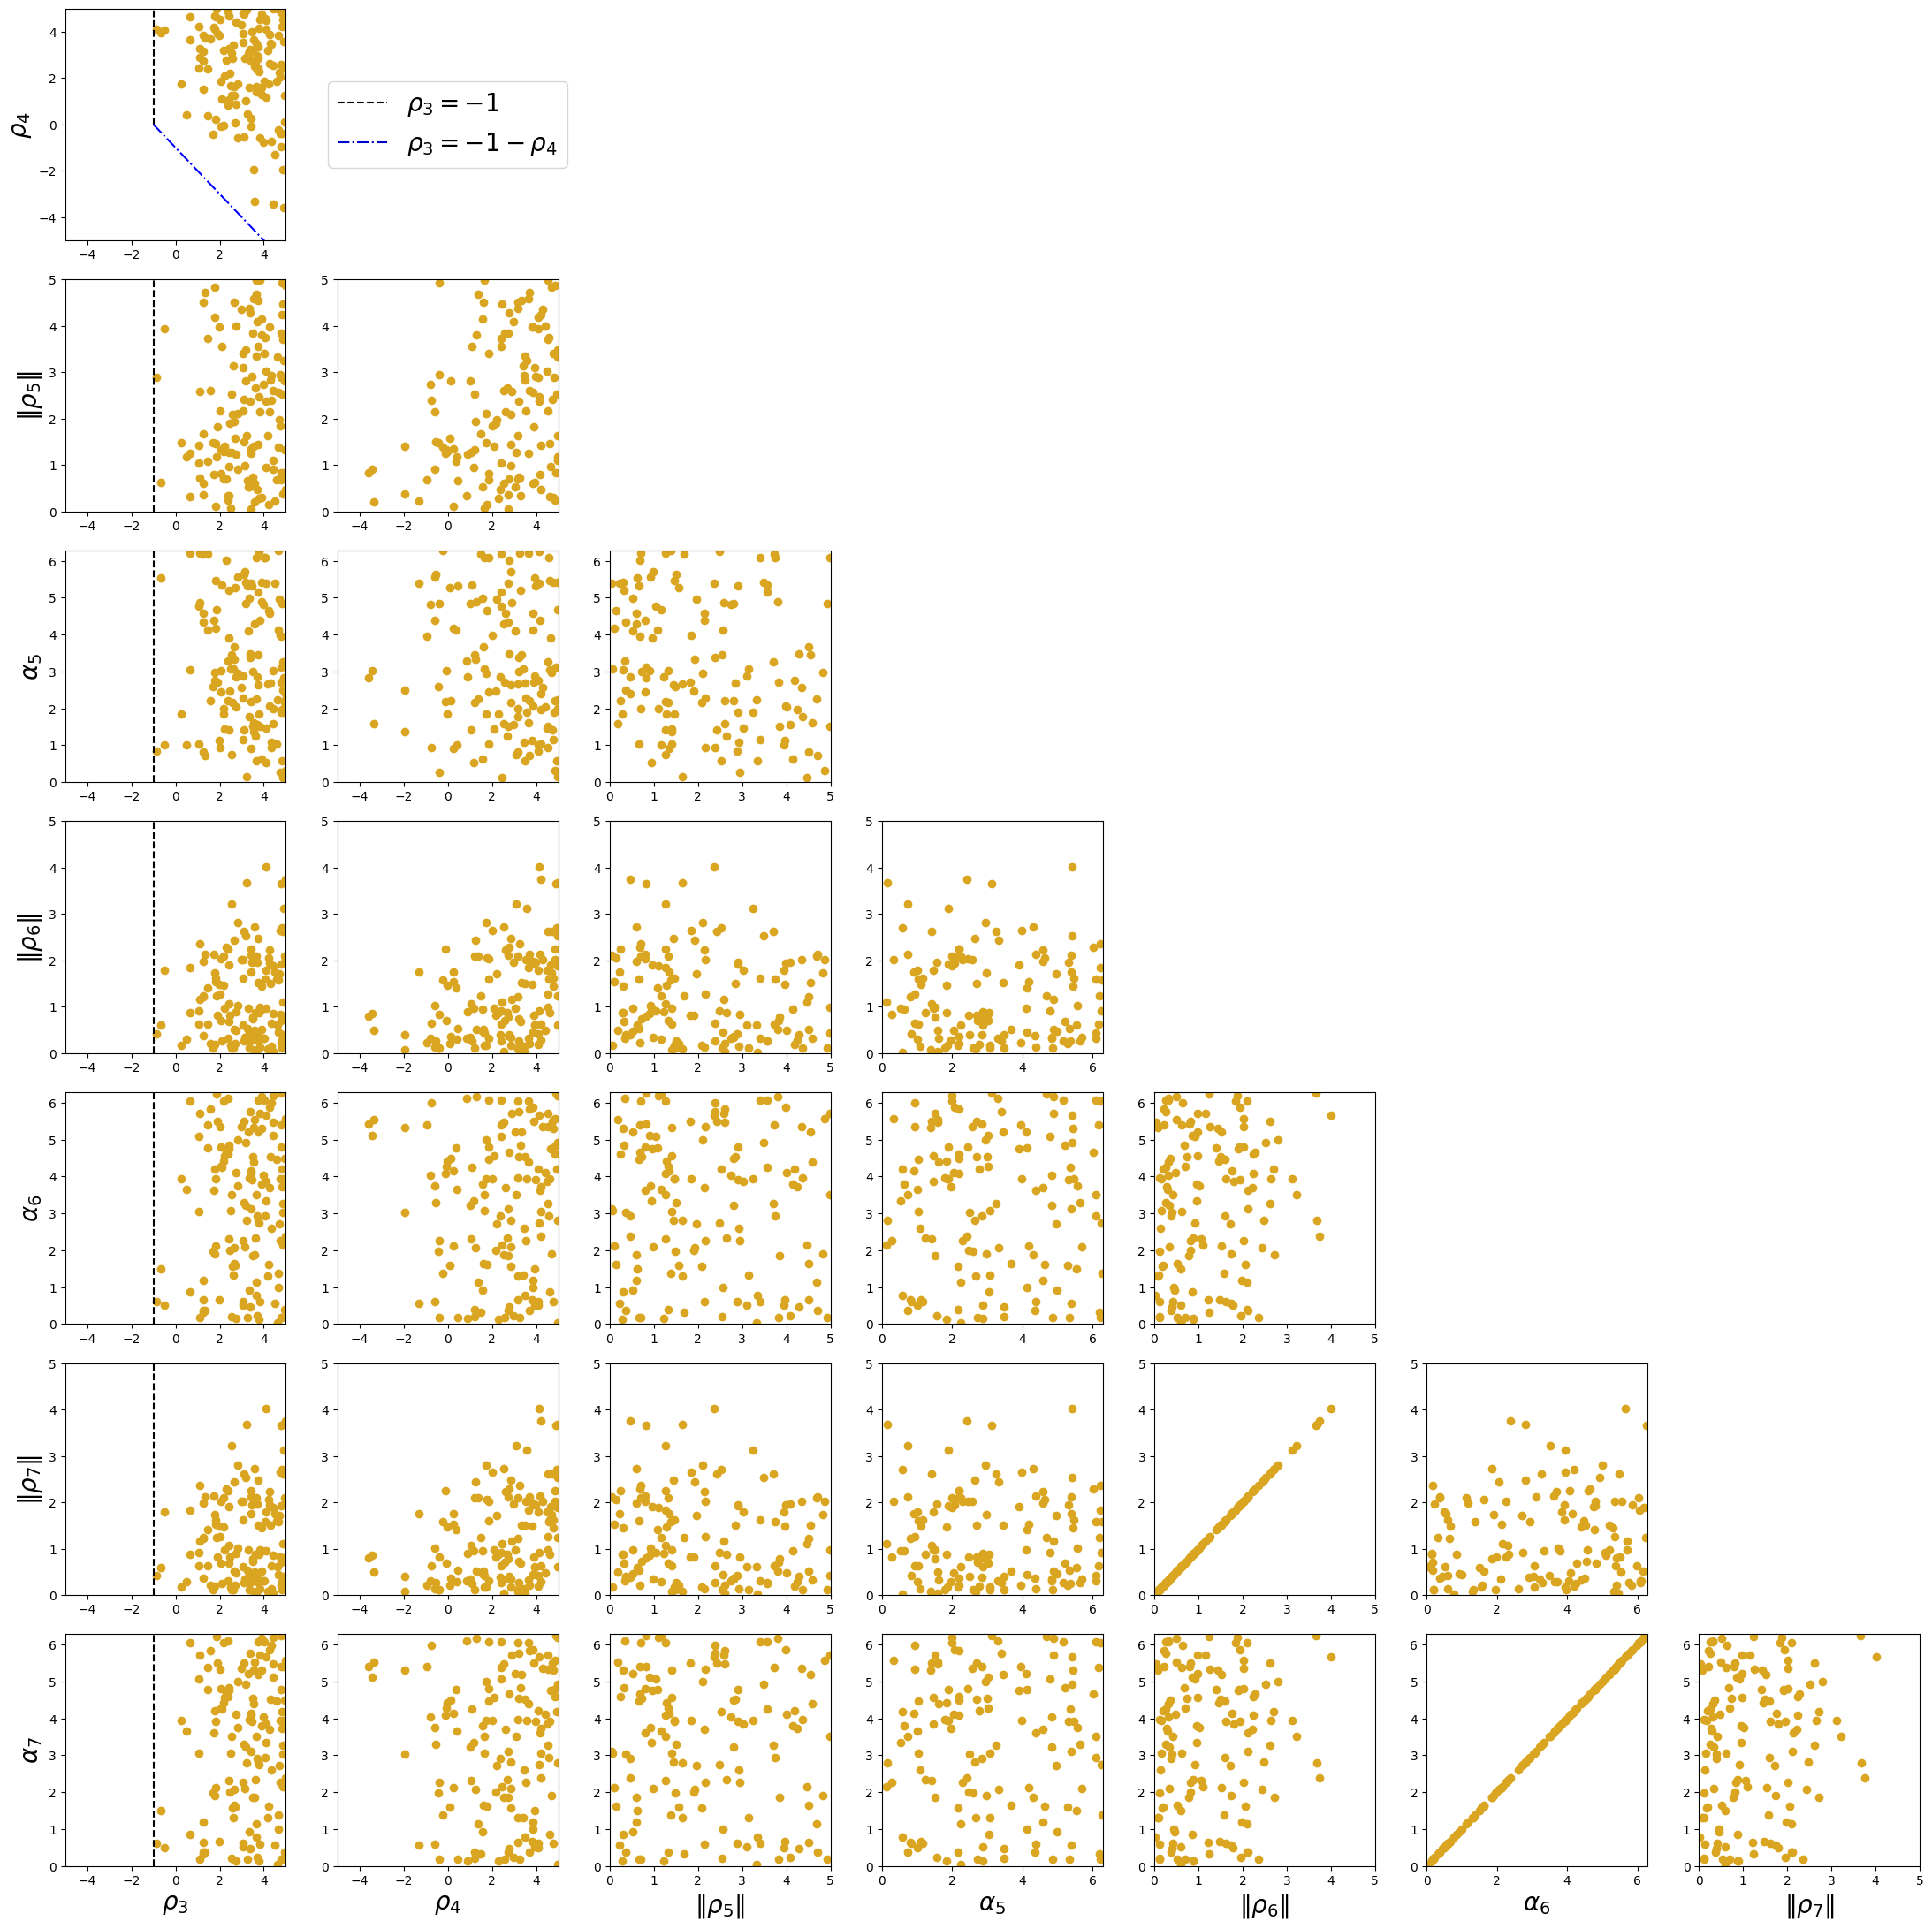

In [93]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

ax.scatter(symmetric_valid_values[:,0], symmetric_valid_values[:,1],color='goldenrod')

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

ax.scatter(symmetric_valid_values[:,0], symmetric_valid_values[:,2],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

ax.scatter(symmetric_valid_values[:,1], symmetric_valid_values[:,2],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

ax.scatter(symmetric_valid_values[:,0], symmetric_valid_values[:,3],color='goldenrod')

ax.set_ylabel(r'$\alpha_{5}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

ax.scatter(symmetric_valid_values[:,1], symmetric_valid_values[:,3],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

ax.scatter(symmetric_valid_values[:,2], symmetric_valid_values[:,3],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

ax.scatter(symmetric_valid_values[:,0], symmetric_valid_values[:,4],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

ax.scatter(symmetric_valid_values[:,1], symmetric_valid_values[:,4],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

ax.scatter(symmetric_valid_values[:,2], symmetric_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

ax.scatter(symmetric_valid_values[:,3], symmetric_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

ax.scatter(symmetric_valid_values[:,0], symmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha_{6}$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

ax.scatter(symmetric_valid_values[:,1], symmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

ax.scatter(symmetric_valid_values[:,2], symmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

ax.scatter(symmetric_valid_values[:,3], symmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

ax.scatter(symmetric_valid_values[:,4], symmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

ax.scatter(symmetric_valid_values[:,0], symmetric_valid_values[:,6],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

ax.scatter(symmetric_valid_values[:,1], symmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

ax.scatter(symmetric_valid_values[:,2], symmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

ax.scatter(symmetric_valid_values[:,3], symmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

ax.scatter(symmetric_valid_values[:,4], symmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

ax.scatter(symmetric_valid_values[:,5], symmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

ax.scatter(symmetric_valid_values[:,0], symmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\alpha_{7}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

ax.scatter(symmetric_valid_values[:,1], symmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

ax.scatter(symmetric_valid_values[:,2], symmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

ax.scatter(symmetric_valid_values[:,3], symmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\alpha_{5}$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

ax.scatter(symmetric_valid_values[:,4], symmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

ax.scatter(symmetric_valid_values[:,5], symmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\alpha_{6}$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

ax.scatter(symmetric_valid_values[:,6], symmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='mediumblue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

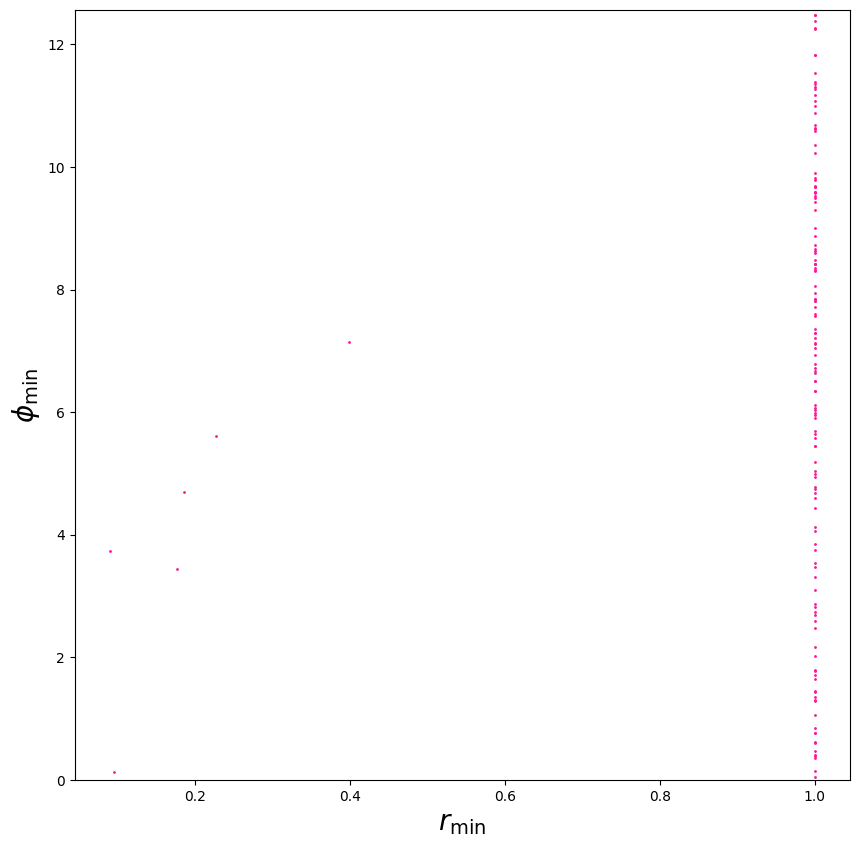

In [94]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1)

ax.scatter(symmetric_valid_values[:,8], symmetric_valid_values[:,9], color='deeppink', s=1)

ax.set_ylabel(r'$\phi_{\text{min}}$',fontsize=20)
ax.set_xlabel(r'$r_{\text{min}}$',fontsize=20)

ax.set_ylim([0, 4*np.pi])

plt.show()

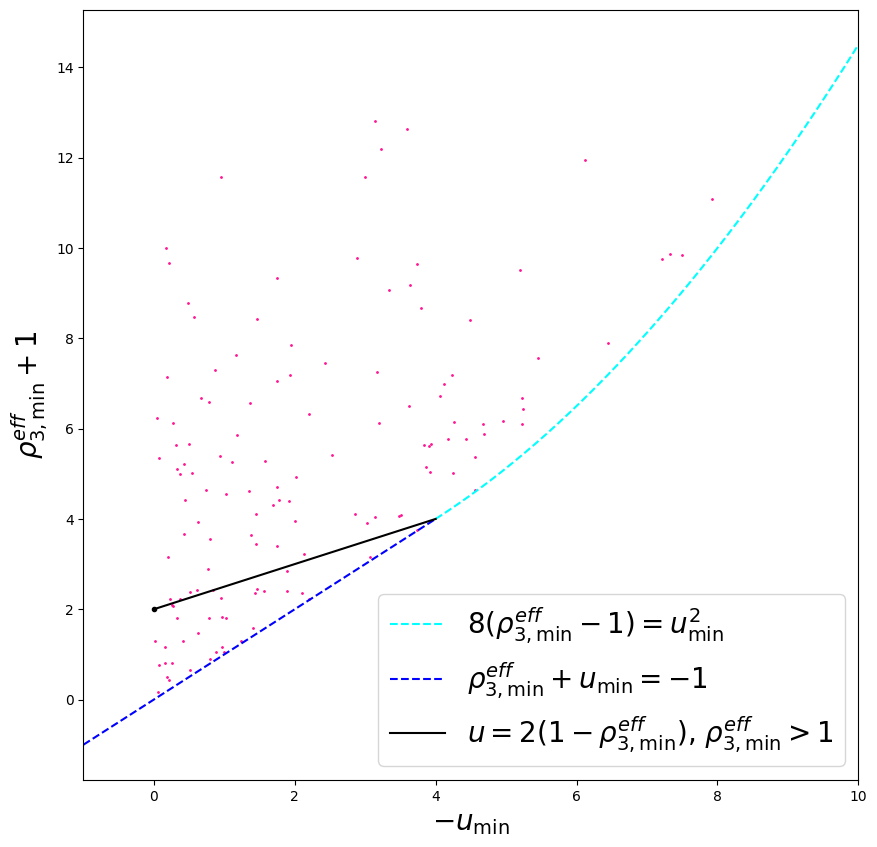

In [95]:
# Define effective parameters

rho_3_Z_2_violating_sym = symmetric_valid_values[:,0]
rho_4_Z_2_violating_sym = symmetric_valid_values[:,1]
rho_5_Z_2_violating_sym = symmetric_valid_values[:,2]
alpha_5_Z_2_violating_sym = symmetric_valid_values[:,3]
rho_6_Z_2_violating_sym = symmetric_valid_values[:,4]
alpha_6_Z_2_violating_sym = symmetric_valid_values[:,5]
rho_7_Z_2_violating_sym = symmetric_valid_values[:,6]
alpha_7_Z_2_violating_sym = symmetric_valid_values[:,7]
r_sym = symmetric_valid_values[:,8]
phi_sym = symmetric_valid_values[:,9]

rho_3_eff_Z_2_violating_sym = rho_3_Z_2_violating_sym + r_sym**2*(rho_4_Z_2_violating_sym + rho_5_Z_2_violating_sym*np.cos(alpha_5_Z_2_violating_sym + phi_sym))

rho_6_eff_Z_2_violating_sym = rho_6_Z_2_violating_sym*r_sym*np.cos(alpha_6_Z_2_violating_sym + (1/2)*phi_sym)

rho_7_eff_Z_2_violating_sym = rho_7_Z_2_violating_sym*r_sym*np.cos(alpha_7_Z_2_violating_sym + (1/2)*phi_sym)

u_Z_2_violating_sym = rho_6_eff_Z_2_violating_sym + rho_7_eff_Z_2_violating_sym

v_Z_2_violating_sym = rho_6_eff_Z_2_violating_sym - rho_7_eff_Z_2_violating_sym

x_var = np.linspace(0,4,1000)
x_var2 = np.linspace(4,10,1000)
x_var3 = np.linspace(-1,4,1000)

plt.figure(figsize=(10,10))

plt.scatter(-u_Z_2_violating_sym,rho_3_eff_Z_2_violating_sym+1,color='deeppink',s=1)

plt.plot(x_var2,x_var2**2/8+2, color='cyan',linestyle='--',label=r'$8(\rho^{eff}_{3,\text{min}}-1) = u^2_{\text{min}}$')
plt.plot(x_var3,x_var3,color='blue',linestyle='--',label=r'$\rho^{eff}_{3,\text{min}}+u_{\text{min}}=-1$')
plt.plot(x_var,x_var/2+2, color='black',label=r'$u=2(1-\rho^{eff}_{3,\text{min}})$, $\rho^{eff}_{3,\text{min}}>1$')
plt.plot(0,2,marker='o',color='black',markersize=3)

plt.legend(loc=4,fontsize=20)
plt.ylabel(r'$\rho^{eff}_{3,\text{min}}+1$',fontsize=20)
plt.xlabel(r'$-u_{\text{min}}$',fontsize=20)
plt.xlim([-1,10])
plt.show()

# Antisymmetric 2HDM potential

In [96]:
# Explore Antisymmetric Z_2-violating 2HDM results

dim = 1000

regions = [(-5, 5),         # rho_3
           (-5, 5),         # rho_4
           (0, 5),          # |rho_5|
           (0, 2*np.pi),    # alpha_5
           (0, 5),          # |rho_6|
           (-np.pi, 2*np.pi),    # alpha_6 (limits have been changed in order to visualize the results better. However, this does not change nothign because the potential is periodic in alpha_6)
           (0, 0),          # |rho_7| will be overwrtten by |rho_6|
           (0, 0)]          # alpha_7 will be overwritten by alpha_6


# Generate random parameters
parameters = generate_random_params(dim, regions)
parameters[:, 6] = parameters[:, 4]  # rho_7 = rho_6
parameters[:, 7] = parameters[:, 5] + np.pi  # alpha_7 = alpha_6+pi (this +pi is the reason why the limits of alpha_6 have been changed)

# Minimize the function and filter the results with V > 0
results = np.array(minimize_dependent_params(parameters, function_variable_regions))
antisymmetric_valid_values = results[results[:, -1] > 0]

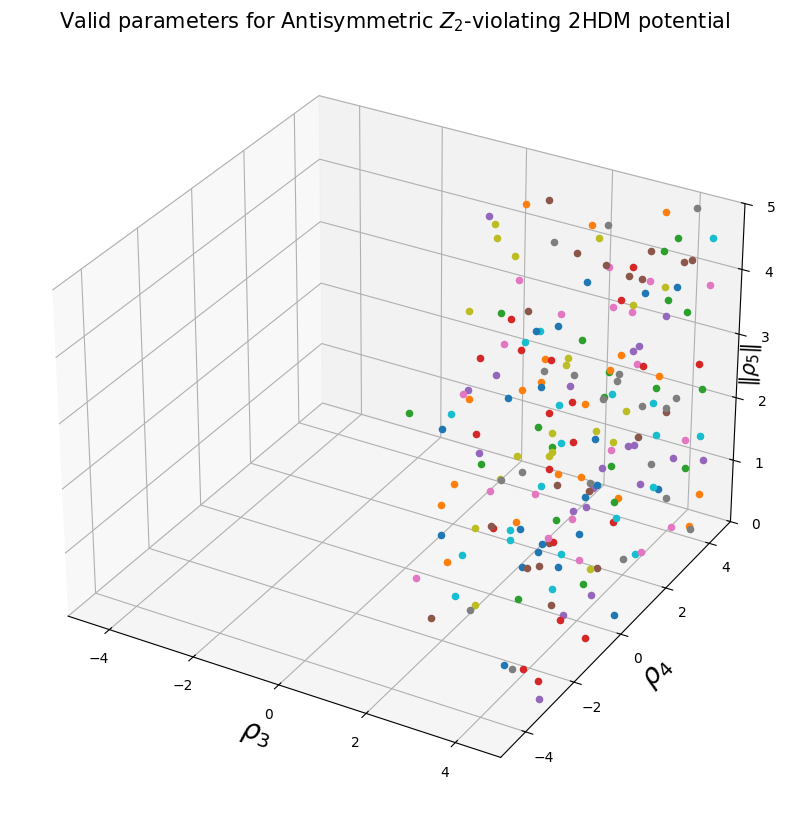

In [97]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(antisymmetric_valid_values)-1,len(antisymmetric_valid_values)):
    #
    ax.scatter(antisymmetric_valid_values[int(point)][0],antisymmetric_valid_values[int(point)][1],antisymmetric_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for Antisymmetric $Z_2$-violating 2HDM potential',fontsize=15)

plt.show()

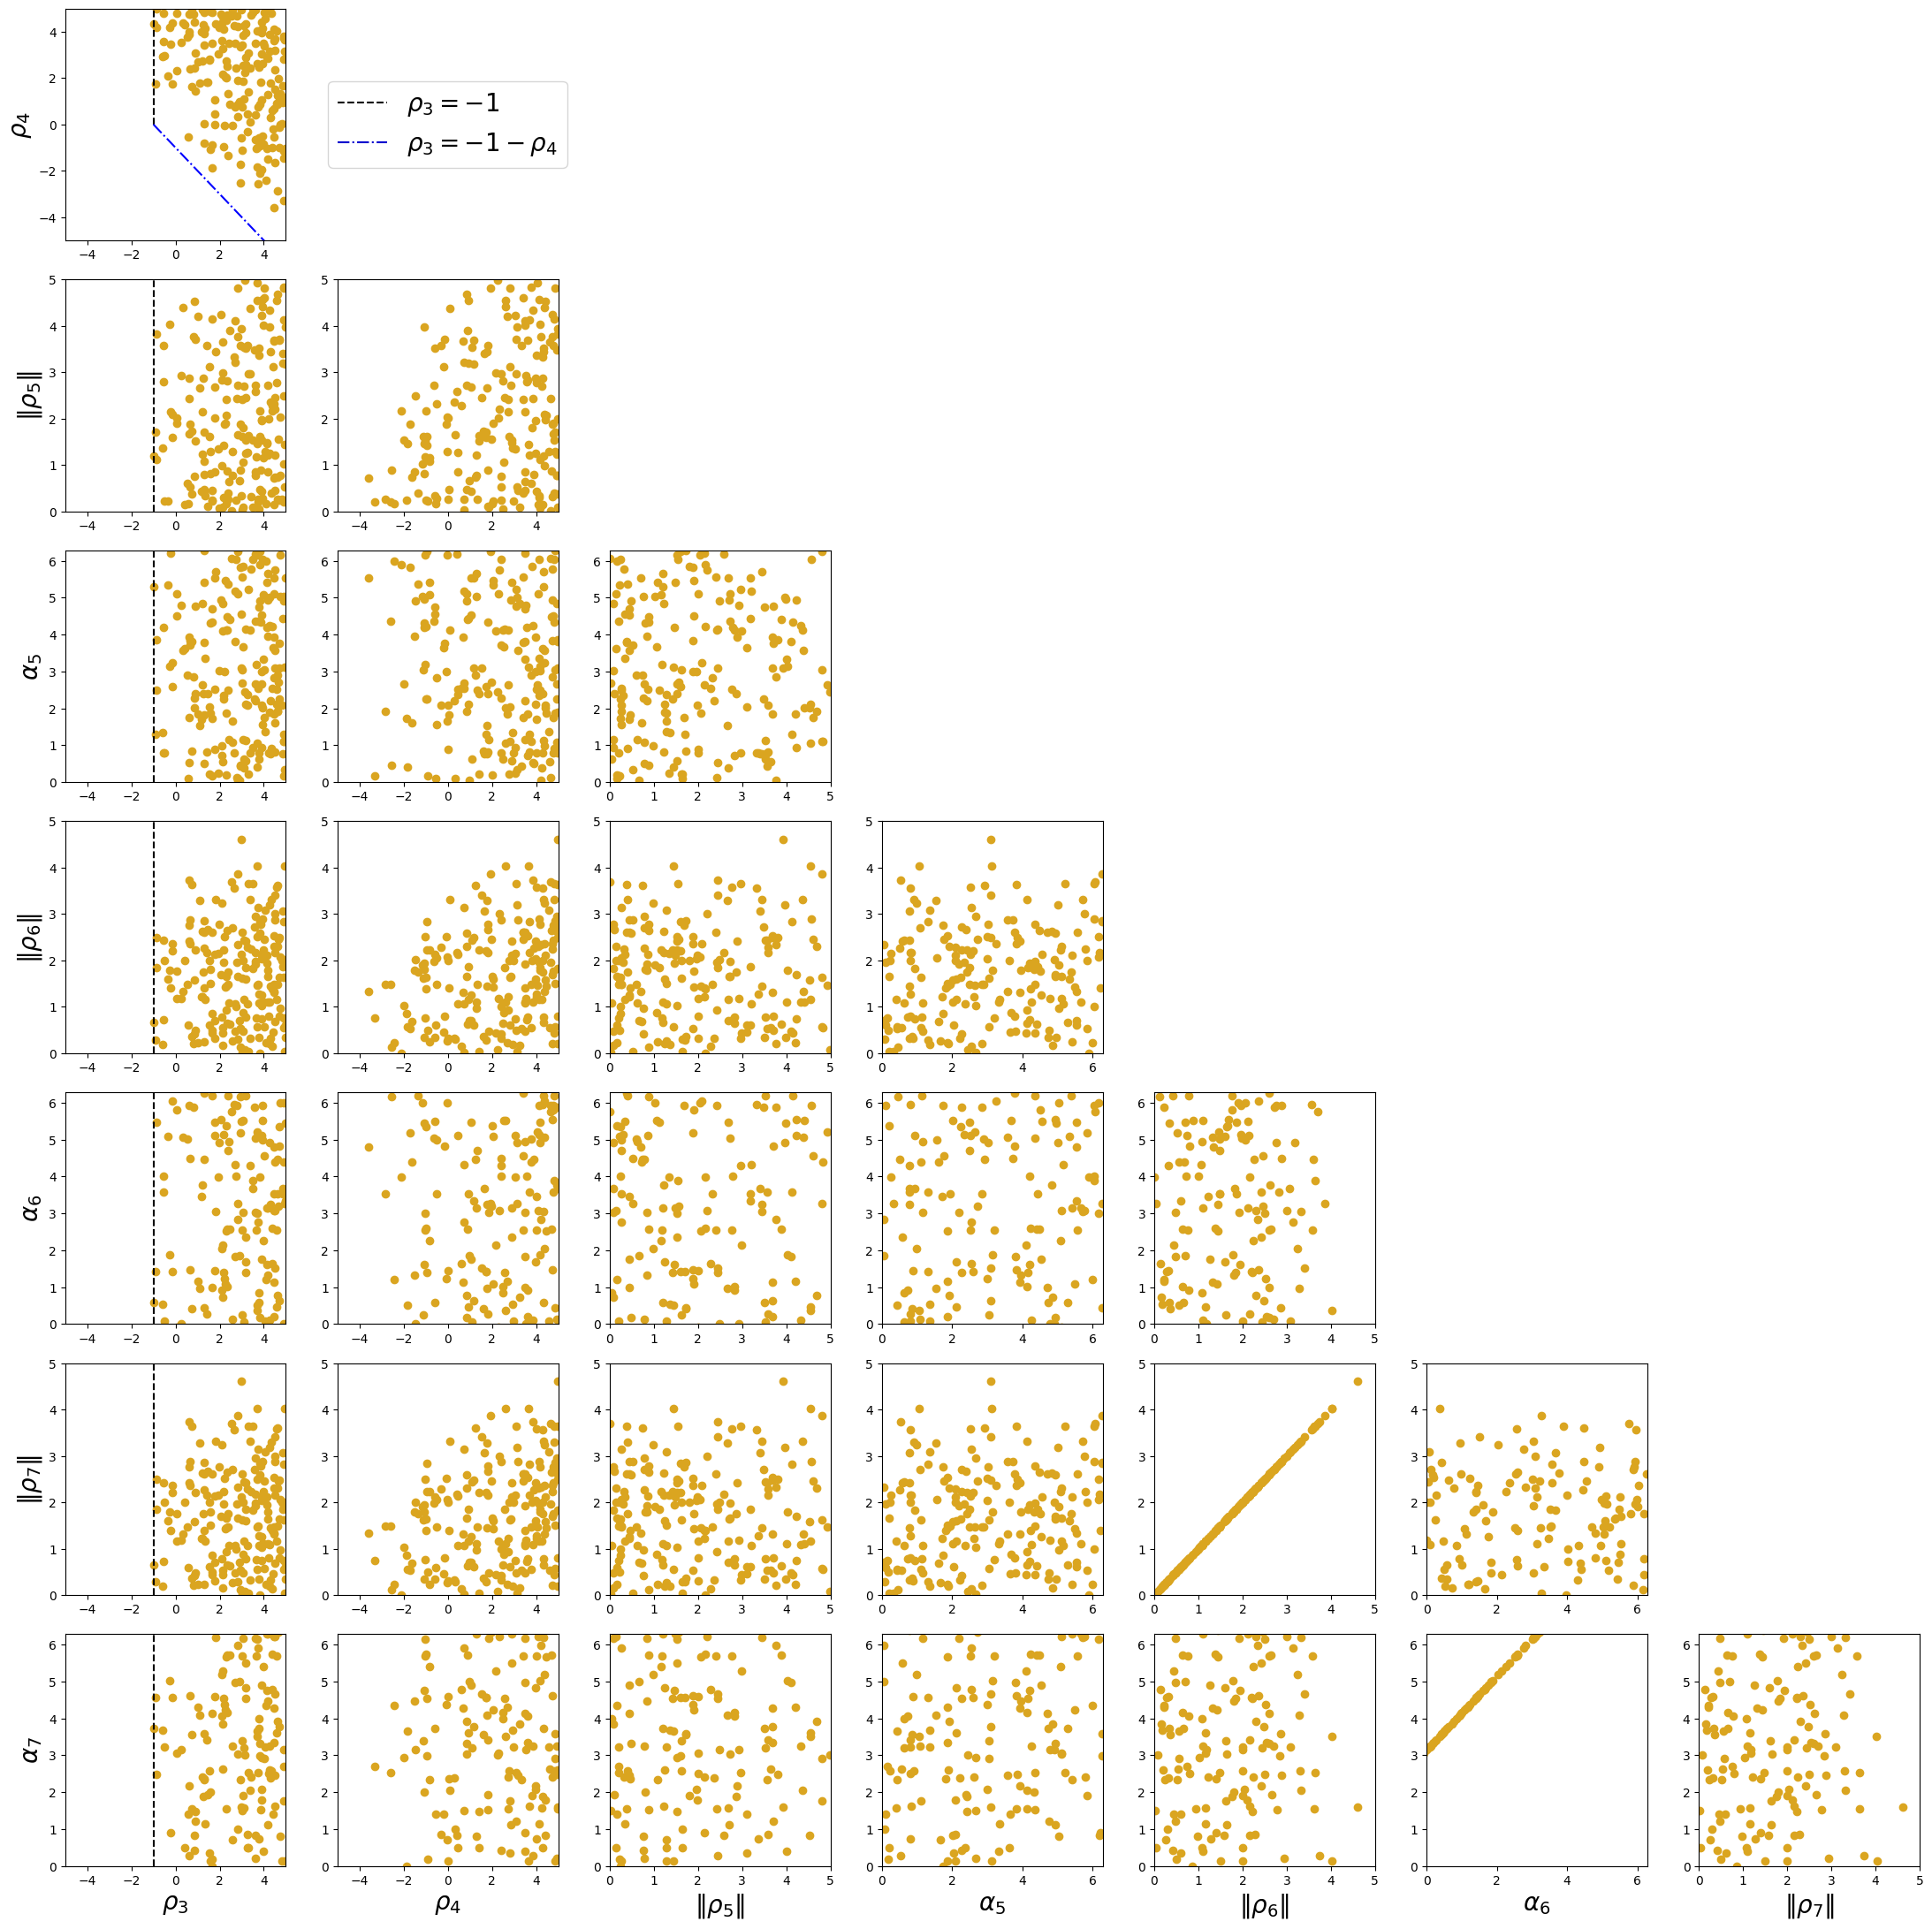

In [98]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

ax.scatter(antisymmetric_valid_values[:,0], antisymmetric_valid_values[:,1],color='goldenrod')

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

ax.scatter(antisymmetric_valid_values[:,0], antisymmetric_valid_values[:,2],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

ax.scatter(antisymmetric_valid_values[:,1], antisymmetric_valid_values[:,2],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

ax.scatter(antisymmetric_valid_values[:,0], antisymmetric_valid_values[:,3],color='goldenrod')

ax.set_ylabel(r'$\alpha_{5}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

ax.scatter(antisymmetric_valid_values[:,1], antisymmetric_valid_values[:,3],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

ax.scatter(antisymmetric_valid_values[:,2], antisymmetric_valid_values[:,3],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

ax.scatter(antisymmetric_valid_values[:,0], antisymmetric_valid_values[:,4],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

ax.scatter(antisymmetric_valid_values[:,1], antisymmetric_valid_values[:,4],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

ax.scatter(antisymmetric_valid_values[:,2], antisymmetric_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

ax.scatter(antisymmetric_valid_values[:,3], antisymmetric_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

ax.scatter(antisymmetric_valid_values[:,0], antisymmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha_{6}$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

ax.scatter(antisymmetric_valid_values[:,1], antisymmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

ax.scatter(antisymmetric_valid_values[:,2], antisymmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

ax.scatter(antisymmetric_valid_values[:,3], antisymmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

ax.scatter(antisymmetric_valid_values[:,4], antisymmetric_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

ax.scatter(antisymmetric_valid_values[:,0], antisymmetric_valid_values[:,6],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

ax.scatter(antisymmetric_valid_values[:,1], antisymmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

ax.scatter(antisymmetric_valid_values[:,2], antisymmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

ax.scatter(antisymmetric_valid_values[:,3], antisymmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

ax.scatter(antisymmetric_valid_values[:,4], antisymmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

ax.scatter(antisymmetric_valid_values[:,5], antisymmetric_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

ax.scatter(antisymmetric_valid_values[:,0], antisymmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\alpha_{7}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

ax.scatter(antisymmetric_valid_values[:,1], antisymmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

ax.scatter(antisymmetric_valid_values[:,2], antisymmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

ax.scatter(antisymmetric_valid_values[:,3], antisymmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\alpha_{5}$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

ax.scatter(antisymmetric_valid_values[:,4], antisymmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

ax.scatter(antisymmetric_valid_values[:,5], antisymmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\alpha_{6}$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

ax.scatter(antisymmetric_valid_values[:,6], antisymmetric_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='mediumblue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

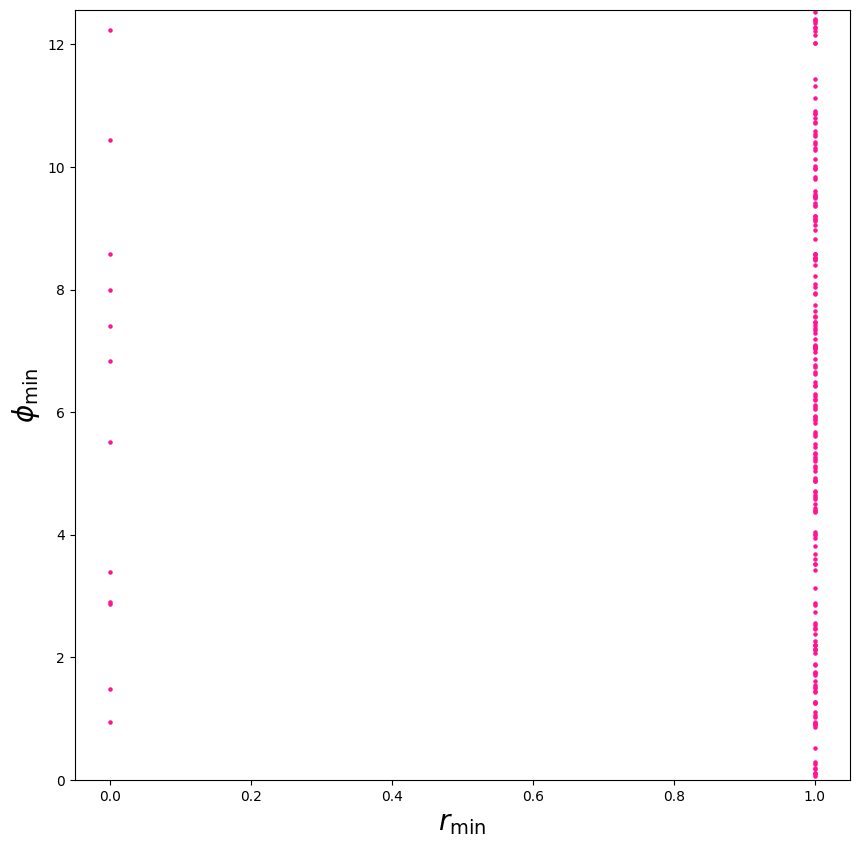

In [99]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1)

ax.scatter(antisymmetric_valid_values[:,8], antisymmetric_valid_values[:,9], color='deeppink',s=5)

ax.set_ylabel(r'$\phi_{\text{min}}$',fontsize=20)
ax.set_xlabel(r'$r_{\text{min}}$',fontsize=20)

ax.set_ylim([0, 4*np.pi])

plt.show()

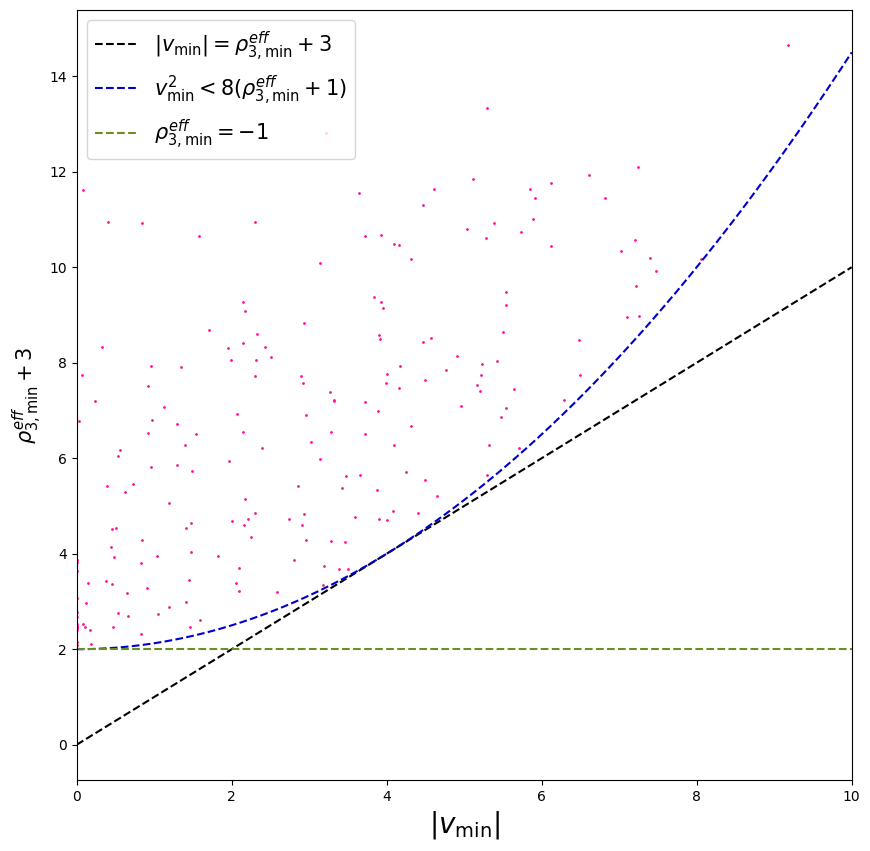

In [100]:
# Define effective parameters

rho_3_Z_2_violating_antisym = antisymmetric_valid_values[:,0]
rho_4_Z_2_violating_antisym = antisymmetric_valid_values[:,1]
rho_5_Z_2_violating_antisym = antisymmetric_valid_values[:,2]
alpha_5_Z_2_violating_antisym = antisymmetric_valid_values[:,3]
rho_6_Z_2_violating_antisym = antisymmetric_valid_values[:,4]
alpha_6_Z_2_violating_antisym = antisymmetric_valid_values[:,5]
rho_7_Z_2_violating_antisym = antisymmetric_valid_values[:,6]
alpha_7_Z_2_violating_antisym = antisymmetric_valid_values[:,7]
r_antisym = antisymmetric_valid_values[:,8]
phi_antisym = antisymmetric_valid_values[:,9]

rho_3_eff_Z_2_violating_antisym = rho_3_Z_2_violating_antisym + r_antisym**2*(rho_4_Z_2_violating_antisym + rho_5_Z_2_violating_antisym*np.cos(alpha_5_Z_2_violating_antisym + phi_antisym))

rho_6_eff_Z_2_violating_antisym = rho_6_Z_2_violating_antisym*r_antisym*np.cos(alpha_6_Z_2_violating_antisym + (1/2)*phi_antisym)

rho_7_eff_Z_2_violating_antisym = rho_7_Z_2_violating_antisym*r_antisym*np.cos(alpha_7_Z_2_violating_antisym + (1/2)*phi_antisym)

u_Z_2_violating_antisym = rho_6_eff_Z_2_violating_antisym + rho_7_eff_Z_2_violating_antisym

v_Z_2_violating_antisym = rho_6_eff_Z_2_violating_antisym - rho_7_eff_Z_2_violating_antisym

plt.figure(figsize=(10,10))

var_x = np.linspace(0,10,1000)
plt.plot(var_x,var_x, color='black',linestyle='--',label=r'$|v_{\text{min}}|=\rho^{eff}_{3,\text{min}}+3$')
plt.plot(var_x,(var_x**2-8)/8+3, color='mediumblue',linestyle='--',label=r'$v^2_{\text{min}} < 8(\rho^{eff}_{3,\text{min}}+1)$')
plt.plot(var_x,np.linspace(2,2,len(var_x)), linestyle='--',color='olivedrab',label=r'$\rho^{eff}_{3,\text{min}}=-1$')

plt.scatter(np.abs(v_Z_2_violating_antisym),rho_3_eff_Z_2_violating_antisym+3, color='deeppink',s=1)
plt.ylabel(r'$\rho^{eff}_{3,\text{min}}+3$',fontsize=15)
plt.xlabel(r'$|v_{\text{min}}|$',fontsize=20)
plt.xlim([0,10])
plt.legend(loc=2,fontsize=15)
plt.show()